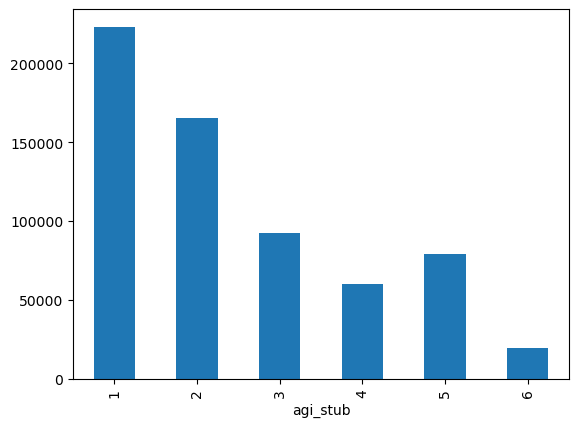

(1476, 147)


In [7]:
###########################################
#You can't analyze what you can't access ##
###########################################

import pandas as pd
import matplotlib.pyplot as plt

#import flat files
data = pd.read_csv("vt_tax_data_2016.csv")

# Plot the total number of tax returns by income group
counts = data.groupby("agi_stub").N1.sum()
counts.plot.bar()
plt.show()


In [9]:
####################################
#####Import a subset of columns ####
####################################
print(data.shape)
#Analyses don't need all these columns
#There is a saying that rows are cheap, but columns are expensive.

# Create list of columns to use
cols = ['zipcode', 'agi_stub', 'mars1', 'MARS2', 'NUMDEP']

# Create dataframe from csv using only selected columns
data = pd.read_csv("vt_tax_data_2016.csv", usecols=cols)

# View counts of dependents and tax returns by income level
print(data.groupby("agi_stub").sum())

(1476, 147)
          zipcode   mars1  MARS2  NUMDEP
agi_stub                                
1         1439444  170320  28480   52490
2         1439444  104000  37690   64660
3         1439444   39160  45390   47330
4         1439444   11670  44410   37760
5         1439444    7820  67750   60730
6         1439444    1210  16340   16300


In [11]:
####################################
####Import a file in chunks #######
####################################
# When working with large files, it can be easier to load and process the data in pieces.

vt_data_first500 = pd.read_csv("vt_tax_data_2016.csv", 
                       		  nrows=500)
print(vt_data_first500.shape)
# Create dataframe of next 500 rows with labeled columns
vt_data_next500 = pd.read_csv("vt_tax_data_2016.csv", 
                       		  nrows=500,
                       		  skiprows=500,
                       		  header=None,
                       		  names=list(vt_data_first500))

# View the Vermont dataframes to confirm they're different
print(vt_data_first500.head())
print(vt_data_next500.head())

(500, 147)
   STATEFIPS STATE  zipcode  agi_stub      N1  mars1  MARS2  MARS4   PREP  \
0         50    VT        0         1  111580  85090  14170  10740  45360   
1         50    VT        0         2   82760  51960  18820  11310  35600   
2         50    VT        0         3   46270  19540  22650   3620  24140   
3         50    VT        0         4   30070   5830  22190    960  16060   
4         50    VT        0         5   39530   3900  33800    590  22500   

       N2  ...  N10300  A10300  N85530  A85530  N85300  A85300  N11901  \
0  130630  ...   53660   50699       0       0       0       0   10820   
1  132950  ...   74340  221146       0       0       0       0   12820   
2   91870  ...   44860  266097       0       0       0       0   10810   
3   71610  ...   29580  264678       0       0       0       0    7320   
4  103710  ...   39170  731963      40      24       0       0   12500   

   A11901  N11902  A11902  
0    9734   88260  138337  
1   20029   68760  151729

In [14]:
####################################
####   Specify data types    #######
####################################
# Load csv with no additional arguments
data = pd.read_csv("vt_tax_data_2016.csv")

# Print the data types
print(data.dtypes)
#agi_stub column contains numbers that correspond to income categories, 
#zipcode has 5-digit values that should be strings

# Create dict specifying data types for agi_stub and zipcode
data_types = {"agi_stub": "category",
			  "zipcode":str}
# Load csv using dtype to set correct data types
data = pd.read_csv("vt_tax_data_2016.csv", dtype=data_types)
# Print data types of resulting frame
print(data.dtypes.head())

#Setting data types at import requires becoming familiar with the data first, 
#but it can save effort later on. 
#A common workflow is to load the data and explore it, 
#then write code that sets data types at import to share with colleagues or other audiences.


STATEFIPS     int64
STATE        object
zipcode       int64
agi_stub      int64
N1            int64
              ...  
A85300        int64
N11901        int64
A11901        int64
N11902        int64
A11902        int64
Length: 147, dtype: object
STATEFIPS       int64
STATE          object
zipcode        object
agi_stub     category
N1              int64
dtype: object


In [ ]:
####################################
####  Set custom NA values   #######
####################################
#Part of data exploration and cleaning consists of checking for missing or NA values 
#and deciding how to account for them.

# Create dict specifying that 0s in zipcode are NA values
null_values = {"zipcode":0}

# Load csv using na_values keyword argument
data = pd.read_csv("vt_tax_data_2016.csv", 
                   na_values=null_values)

# View rows with NA ZIP codes
print(data[data.zipcode.isna()])

#use NA-specific functions to do things like count missing values or drop records with missing values.

In [27]:
####################################
####  Set custom NA values   #######
####################################
#files with bad data, like records with more values than columns. 
#By default, trying to import such files triggers a specific error, pandas.errors.ParserError.
try:
  # Set warn_bad_lines to issue warnings about bad records
  data = pd.read_csv("vt_tax_data_2016_corrupt.csv", 
                     error_bad_lines=False, 
                     warn_bad_lines=True)
  # View first 5 records
  print(data.head())
except pd.errors.ParserError:
    print("Your data contained rows that could not be parsed.")


         STATEFIPS   STATE zipcode  agi_stub     N1  mars1   MARS2   MARS4  \
50 VT 0          1  111580  tototo     85090  14170  10740   45360  130630   
      0          2   82760   51960     18820  11310  35600  132950   32310   
      0          3   46270   19540     22650   3620  24140   91870   23610   
      0          4   30070    5830     22190    960  16060   71610   18860   
      0          5   39530    3900     33800    590  22500  103710   30330   

          PREP    N2  ...  A06500  N10300  A10300  N85530  A85530  N85300  \
50 VT 0  26200  5900  ...   50699       0       0       0       0   10820   
      0   1670   840  ...       0       0       0       0   12820   20029   
      0    170     0  ...       0       0       0       0   10810   24499   
      0      0     0  ...       0       0       0       0    7320   21573   
      0      0     0  ...      40      24       0       0   12500   67761   

         A85300  N11901    A11901    N11902  
50 VT 0    9734   8826

/var/folders/71/cw4619mx1cg51qdyd4685r3r0000gp/T/ipykernel_43442/2051313475.py:8: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv("vt_tax_data_2016_corrupt.csv",
/var/folders/71/cw4619mx1cg51qdyd4685r3r0000gp/T/ipykernel_43442/2051313475.py:8: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv("vt_tax_data_2016_corrupt.csv",
